In [10]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('../output/preprocessed.csv')

/tmp/ipykernel_69122/3128184025.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../output/preprocessed.csv')


In [3]:
data.head()

,timestamp,text,text_id,user,user_id,hashtags,mentions,emojis,frequency,language,translated_text
0,00:00:00,run business mean juggle countless administrat...,2018569761,danielwoodard,1077866112,"['#HRtech', '#businessmanagement']",[],[],1,en,NaN
1,00:00:00,liz truss walk linger shadow predecessor charl...,2092717718,nelsonjacqueline,1089670430,['#politics'],[],[],1,en,NaN
2,00:00:00,uk brace war government building london raise ...,2059143248,ihooper,1007478642,"['#Ukrainewashed', '#WarPreparedness']",[],['🇺🇦'],1,en,NaN
3,00:00:00,marry second cousin remove taboo think genetic...,2008209828,wrightnicholas,1039258480,"['#FamilyTree', '#GeneticFacts']",[],['🧬'],1,en,NaN
4,00:00:00,truly disgraceful indian national congress sto...,2001239278,michael51,1021455936,['#RationChorCongress'],[],"['🤦', '♂']",1,en,NaN


In [4]:
# Extract hashtags and count their frequencies
hashtags_series = data['hashtags'].explode()
hashtags_series = hashtags_series[hashtags_series != '[]']  # Remove empty lists
hashtags_series = hashtags_series.str.strip("[]").str.replace("'", "").str.split(", ")
hashtags_series = hashtags_series.explode()
top_hashtags = hashtags_series.value_counts().head(20)
top_hashtags

hashtags
#BTSBBMAs                 3083
#BBMAs                    2164
#business                 1766
#politics                 1467
#VoteBTS                  1222
#BTS                      1201
#AMAs                     1034
#health                    907
#healthcare                882
#Politics                  789
#ClimateEmergency          705
#Health                    697
#MentalHealthAwareness     679
#Unknown                   677
#mentalhealth              674
#ARMY                      665
#COP26                     639
#ScotRadar                 629
#COP26Glasgow              611
#BTSForever                606
Name: count, dtype: int64

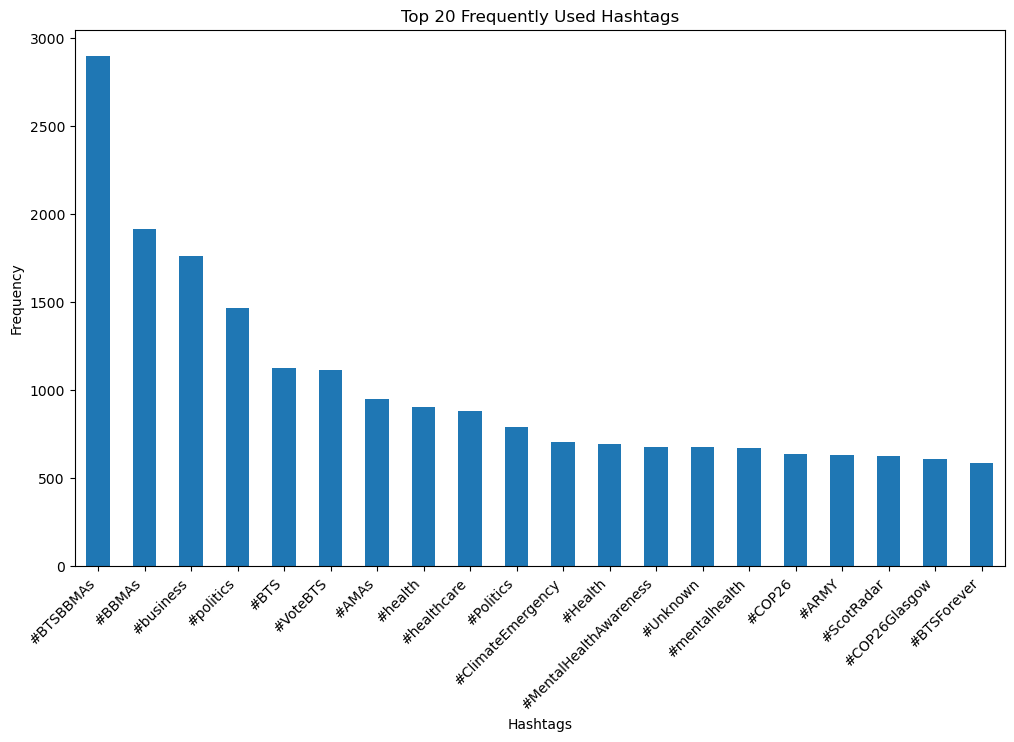

In [30]:
# Plot the top 20 hashtags
plt.figure(figsize=(12, 8))
top_hashtags.plot(kind='bar')
plt.title('Top 20 Frequently Used Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.gcf().subplots_adjust(bottom=0.21)  # Add padding to the bottom
plt.savefig('../figures/top-20-hashtags.png')
plt.show()

In [8]:
# Combine all text into a single string
all_text = ' '.join(data['text'].dropna())

# Use regex to find all words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_words = word_counts.most_common(20)

# Separate the words and their counts for plotting
words, counts = zip(*top_words)

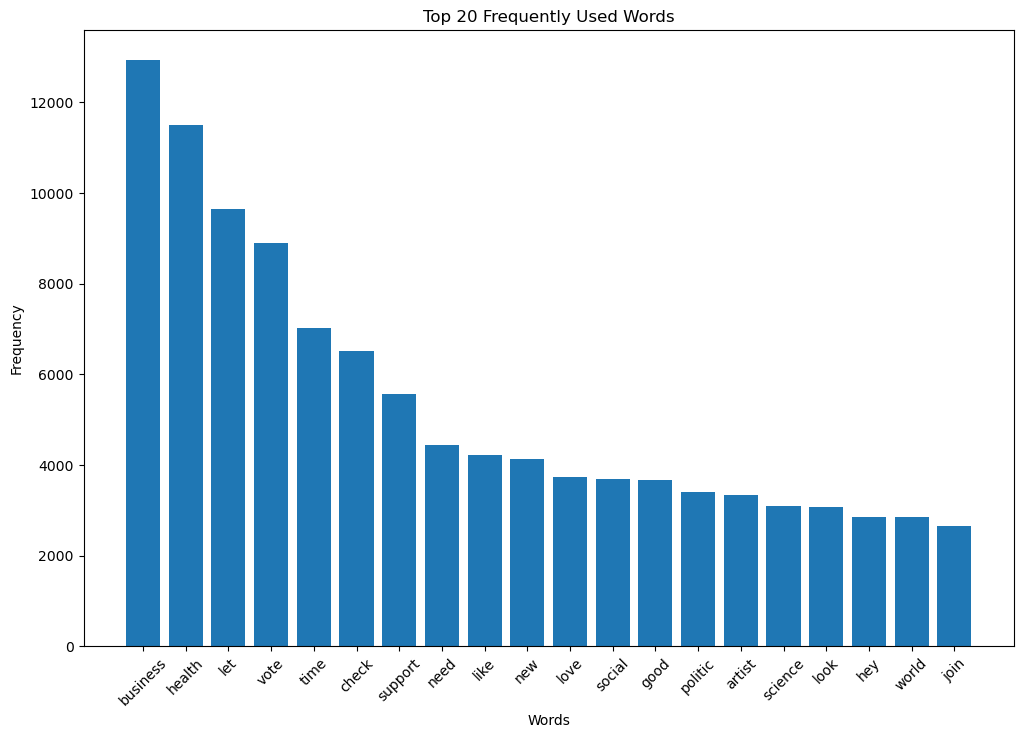

In [31]:
# Plot the top 20 words
plt.figure(figsize=(12, 8))
plt.bar(words, counts)
plt.title('Top 20 Frequently Used Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('../figures/top-20-used-words.png')
plt.show()

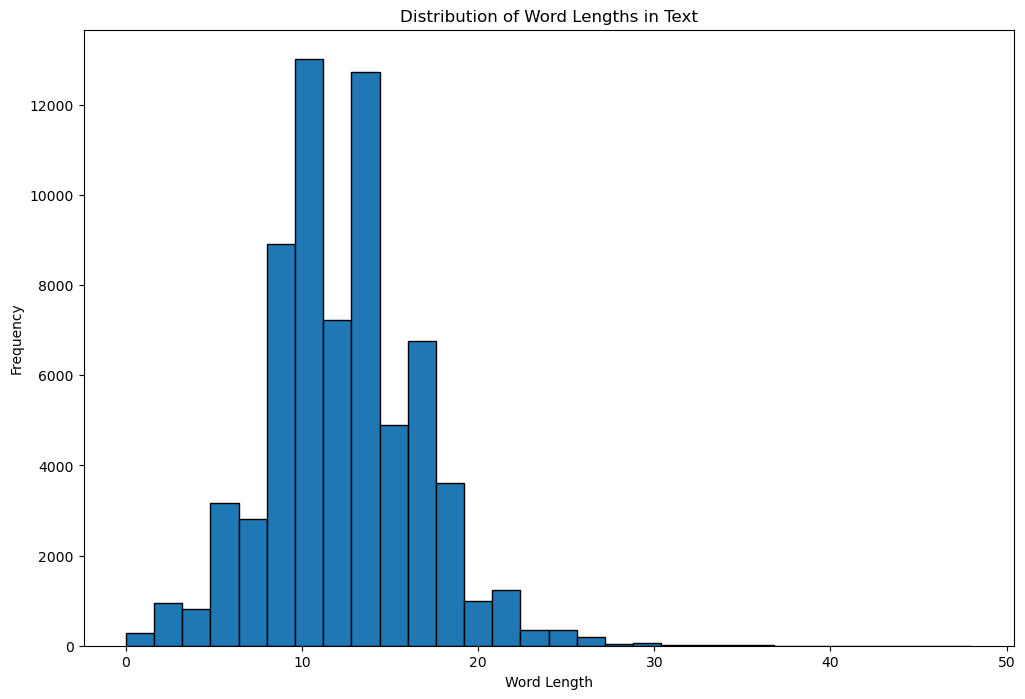

In [32]:
# Calculate the word length of each text
data['word_length'] = data['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plot the distribution of word lengths
plt.figure(figsize=(12, 8))
data['word_length'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Word Lengths in Text')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.savefig('../figures/word-length.png')
plt.show()